In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.set_printoptions(suppress=True)
np.random.seed(666)

In [13]:
# dataset = pd.read_csv('data.csv', sep='\t', header=None, names=['X1', 'X2', 'label'])
dataset = pd.read_csv('data1.txt', sep=',', header=None, names=['X1', 'X2', 'label'])
dataset['X1'] = (dataset['X1'] - dataset['X1'].min()) / (dataset['X1'].max() - dataset['X1'].min())
dataset['X2'] = (dataset['X2'] - dataset['X2'].min()) / (dataset['X2'].max() - dataset['X2'].min())

In [14]:
dataset.head()
dataset.describe()

,X1,X2,label
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


In [15]:
x = dataset[['X1','X2']]
y = dataset['label']

0.2088009638946441
批量梯度下降算法耗时： 0.6616339683532715
迭代到第10000次，结束迭代！


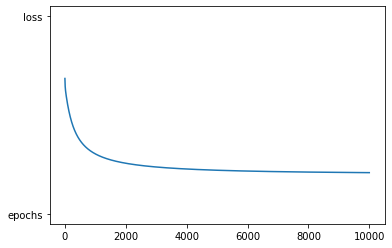

0.37161060164699977
随机梯度下降算法耗时： 0.7815470695495605
迭代到第10000次，结束迭代！


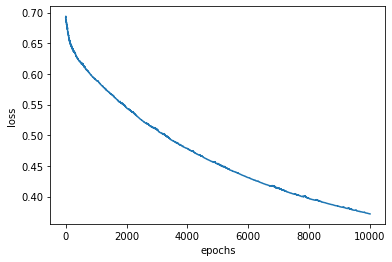

0.22126437394738485
小批量梯度下降算法耗时： 1.9598753452301025
迭代到第10000次，结束迭代！


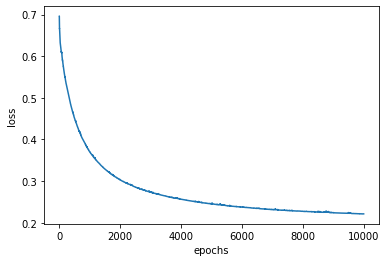

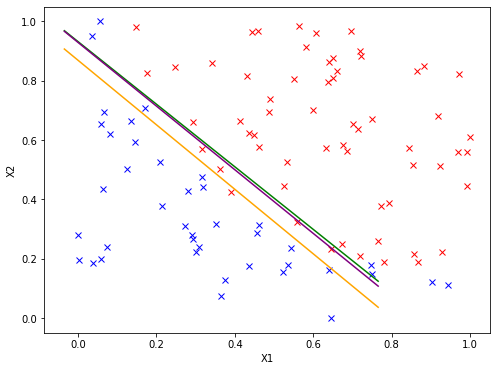

[[ 11.37198529]
 [ 10.76830341]
 [-10.039556  ]] [[ 3.24847373]
 [ 2.98399485]
 [-2.59436983]] [[ 9.38761887]
 [ 8.73997431]
 [-8.12442334]]


In [32]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def cost(dataMatrix, weights, labelMatrix):
    m, n = dataMatrix.shape
    y_hat = sigmoid(dataMatrix.dot(weights))
    c = (-1.0/m) * np.sum(labelMatrix * np.log(y_hat) + (1 - labelMatrix) * np.log(1 - y_hat))
    return c

def gradDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4):
    dataMatrix = np.array(dataMat)
    labelMatrix = np.array(labelMat).reshape((-1,1))
    m, n = dataMatrix.shape
    bias_column = np.array([1 for i in range(m)])
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    m, n = dataMatrix.shape
#     weights = np.ones((n, 1))
    weights = np.zeros((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix)
        y_hat = sigmoid(dataMatrix.dot(weights))
        error = labelMatrix- y_hat
        last_weights = weights
        gradient = -(1.0/m) * dataMatrix.T.dot(error)
        weights = last_weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.plot('epochs')
    plt.plot('loss')
    plt.show()
    return weights

def sGradientDescent(dataMat, labelMat, alpha=0.01, maxepochs=500, epsilion=1e-4):
    dataMatrix = np.array(x)
    m, n = dataMat.shape
    bias_column = [1 for i in range(m)]
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    labelMatrix = np.array(y)
    labelMatrix = labelMatrix.reshape((-1, 1))
    m, n = dataMatrix.shape
#     weights = np.ones((n, 1))
    weights = np.zeros((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        rand_i = np.random.randint(m)
        loss = cost(dataMatrix, weights, labelMatrix)
        y_hat = sigmoid(dataMatrix[rand_i, :].dot(weights))
        error = labelMatrix[rand_i] - y_hat
        gradient = - dataMatrix[rand_i, :].reshape(-1, 1).dot(error.reshape(-1, 1))
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("随机梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

def mBGradDescent(dataMat, labelMat, alpha=0.01, batch_size=10, maxepochs=500, epsilion=1e-4):
    dataMatrix = np.array(dataMat)
    m, n = dataMatrix.shape
    bias_column = [1 for i in range(m)]
    dataMatrix = np.column_stack((dataMatrix, bias_column))
    labelMatrix = np.array(labelMat).reshape(-1, 1)
    m, n = dataMatrix.shape
#     weights = np.ones((n, 1))
    weights = np.zeros((n, 1))
    epoch_count = 0
    loss_list = []
    epoch_list = []
    starttime = time.time()
    while epoch_count < maxepochs:
        loss = cost(dataMatrix, weights, labelMatrix)
        rand_indexes = np.random.choice(range(m), batch_size, replace=False) #参数replace 用来设置是否可以取相同元素：True表示可以取相同数字；False表示不可以取相同数字。默认是True
        y_hat = sigmoid(dataMatrix[rand_indexes].dot(weights))
        error = labelMatrix[rand_indexes] - y_hat
        gradient = (-1.0/batch_size) * dataMatrix[rand_indexes].T.dot(error)
        weights = weights - alpha * gradient
        loss_new = cost(dataMatrix, weights, labelMatrix)
        if abs(loss_new - loss) < epsilion:
            break
        loss_list.append(loss_new)
        epoch_list.append(epoch_count)
        epoch_count += 1
    print(loss_new)
    print("小批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epoch_count))
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights
    
        
def plotBsetFit(gd_weights, sgd_weights, mbgd_weights):
    x1_positive, x1_negative = [], []
    x2_positive, x2_negative = [], []
    m, n = x.shape
    dataMatrix = np.array(x)
    labelMatrix = np.array(y)
    for i in range(m):
        if labelMatrix[i] == 1:
            x1_positive.append(dataMatrix[i][0])
            x2_positive.append(dataMatrix[i][1])
        else:
            x1_negative.append(dataMatrix[i][0])
            x2_negative.append(dataMatrix[i][1])
    plt.figure(figsize=(8, 6))
    plt.plot(x1_positive, x2_positive, 'rx')
    plt.plot(x1_negative, x2_negative, 'vx')
    x_range = np.arange(dataMatrix[0].min() - 0.1, dataMatrix[0].max() + 0.1, 0.1)
    y_range = (-gd_weights[2] - gd_weights[0] * x_range) /gd_weights[1]
    y_range_sgd = (-sgd_weights[2] - sgd_weights[0] * x_range) /sgd_weights[1]
    mbgd_weights = (-mbgd_weights[2] - mbgd_weights[0] * x_range) /mbgd_weights[1]
    plt.plot(x_range, y_range, color='green')
    plt.plot(x_range, y_range_sgd, color = 'orange')
    plt.plot(x_range, mbgd_weights, color = 'purple')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def main():
#     gd_weights = gradDescent(x, y, maxepochs=10000)
#     sgd_weights = sGradientDescent(x, y, maxepochs=10000)
#     mbgd_weights = mBGradDescent(x, y, batch_size=50, maxepochs=10000)
#     plotBsetFit(gd_weights, sgd_weights, mbgd_weights)
#     print(gd_weights, sgd_weights, mbgd_weights)
    gd_weights = gradDescent(x, y, alpha=0.2, maxepochs=10000, epsilion=1e-10)
    sgd_weights = sGradientDescent(x, y, alpha=0.01, maxepochs=10000, epsilion=1e-10)
    mbgd_weights = mBGradDescent(x, y, batch_size=10, alpha=0.1, maxepochs=10000, epsilion=1e-10)
    plotBsetFit(gd_weights, sgd_weights, mbgd_weights)
    print(gd_weights, sgd_weights, mbgd_weights)

if __name__=='__main__':
    main()